In [17]:
%matplotlib inline
import nilearn.plotting as niplt
import nibabel as nib

# Face only

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


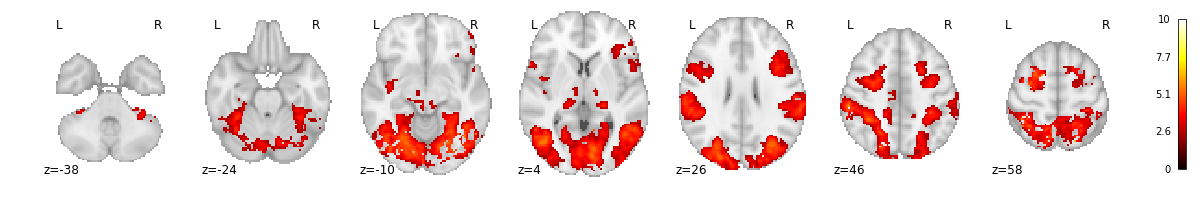

In [6]:
niplt.plot_stat_map('D:neuroscout/analyses/merlin/face/group/stats/contrast_01/zstat1_threshold.nii.gz', display_mode='z')

In [18]:
img1 = nib.load('C:/Users/aid338/Downloads/visual_face.nii.gz')

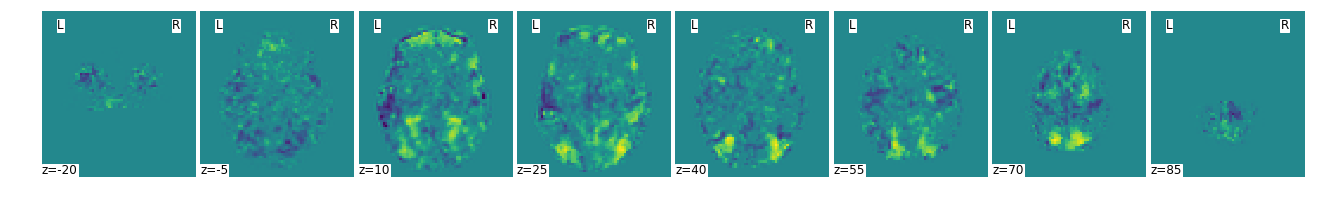

In [39]:
niplt.plot_img('C:/Users/aid338/Downloads/visual_face.nii.gz', display_mode='z', cut_coords=np.arange(-20, 90, 15))

In [34]:
img2 = nib.load('D:neuroscout/analyses/merlin/faceold/21/copes/cope01.nii.gz')

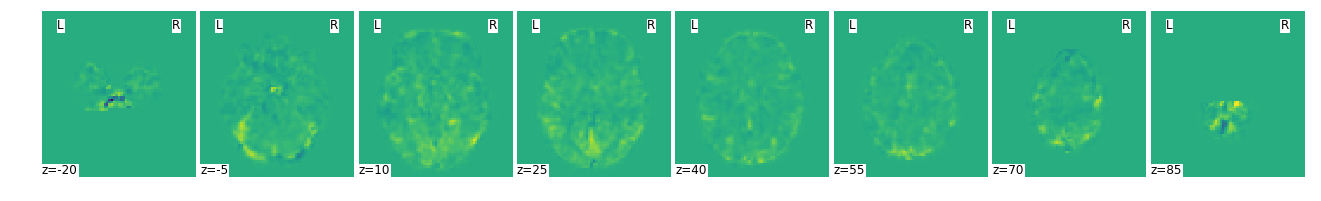

In [38]:
niplt.plot_img('D:neuroscout/analyses/merlin/faceold/21/copes/cope01.nii.gz', display_mode='z', cut_coords=np.arange(-20, 90, 15))

In [23]:
img1.get_data().flatten().corr (img2.get_data().flatten())

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [24]:
data = img1.get_data().flatten()

In [29]:
from scipy.stats import pearsonr

In [35]:
pearsonr(img1.get_data().flatten(), img2.get_data().flatten())

(0.13177441549664248, 0.0)

# Face some

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

In [279]:
contrasts = [(u'face', 'T', [u'face', u'rmse', u'speech', u'BrightnessExtractor_brightness'], [1.0, 0.0, 0.0, 0.0]), (u'rmse', 'T', [u'face', u'rmse', u'speech', u'BrightnessExtractor_brightness'], [0.0, 1.0, 0.0, 0.0]), (u'speech', 'T', [u'face', u'rmse', u'speech', u'BrightnessExtractor_brightness'], [0.0, 0.0, 1.0, 0.0]), (u'BrightnessExtractor_brightness', 'T', [u'face', u'rmse', u'speech', u'BrightnessExtractor_brightness'], [0.0, 0.0, 0.0, 1.0]), (u'face>rmse', 'T', [u'face', u'rmse', u'speech', u'BrightnessExtractor_brightness'], [1.0, -1.0, 0.0, 0.0]), (u'face>speech', 'T', [u'face', u'rmse', u'speech', u'BrightnessExtractor_brightness'], [1.0, 0.0, -1.0, 0.0]), (u'face>BrightnessExtractor_brightness', 'T', [u'face', u'rmse', u'speech', u'BrightnessExtractor_brightness'], [1.0, 0.0, 0.0, -1.0]), (u'rmse>speech', 'T', [u'face', u'rmse', u'speech', u'BrightnessExtractor_brightness'], [0.0, 1.0, -1.0, 0.0]), (u'rmse>BrightnessExtractor_brightness', 'T', [u'face', u'rmse', u'speech', u'BrightnessExtractor_brightness'], [0.0, 1.0, 0.0, -1.0]), (u'speech>BrightnessExtractor_brightness', 'T', [u'face', u'rmse', u'speech', u'BrightnessExtractor_brightness'], [0.0, 0.0, 1.0, -1.0])]
labels = list(zip(*contrasts))[0]

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


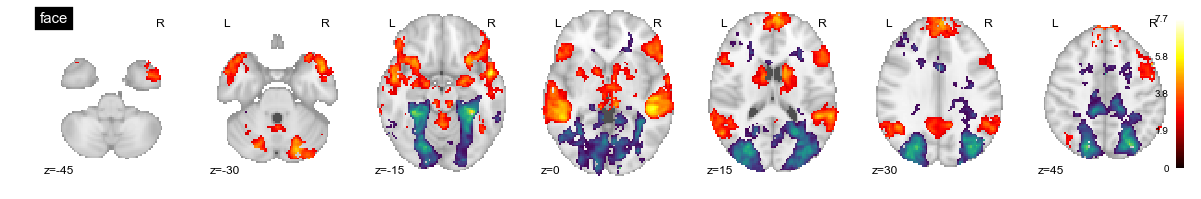

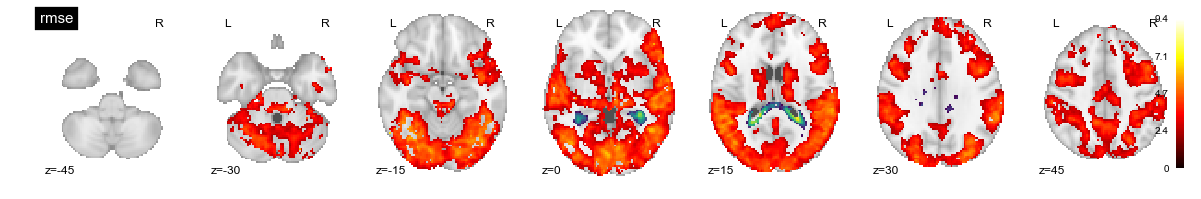

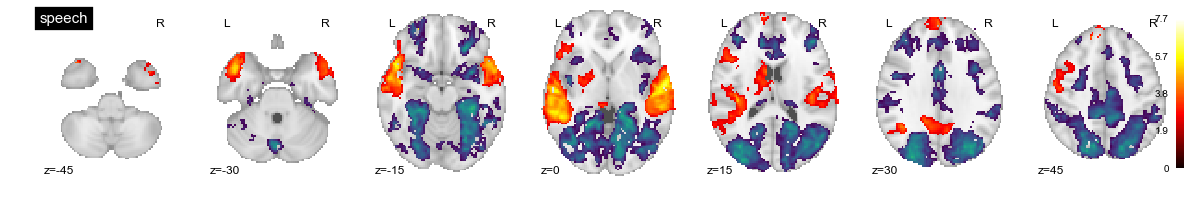

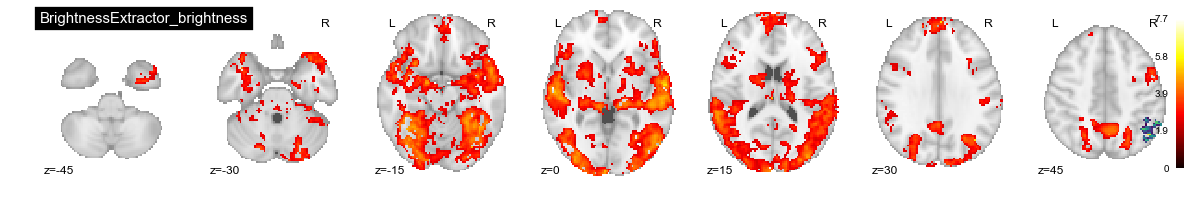

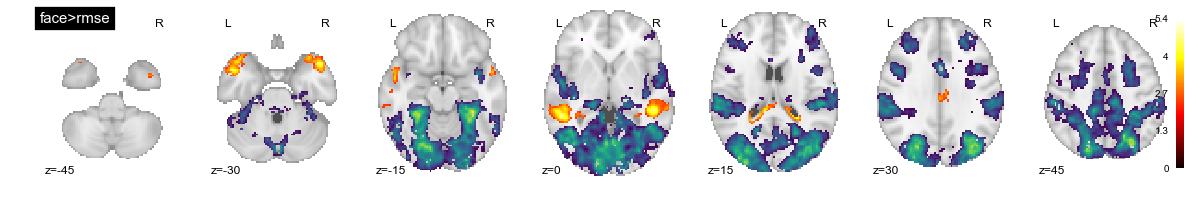

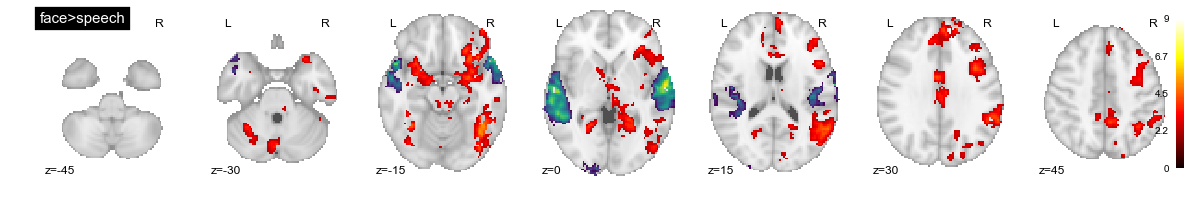

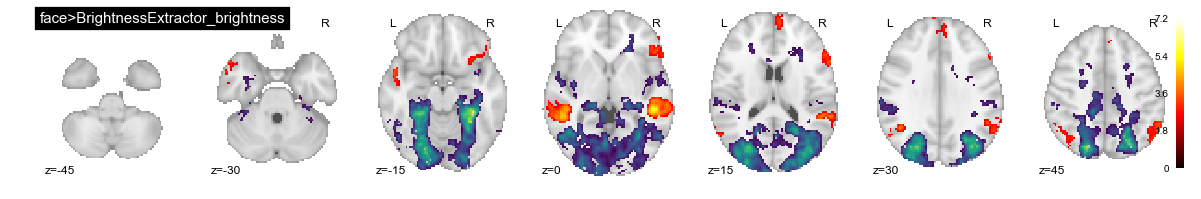

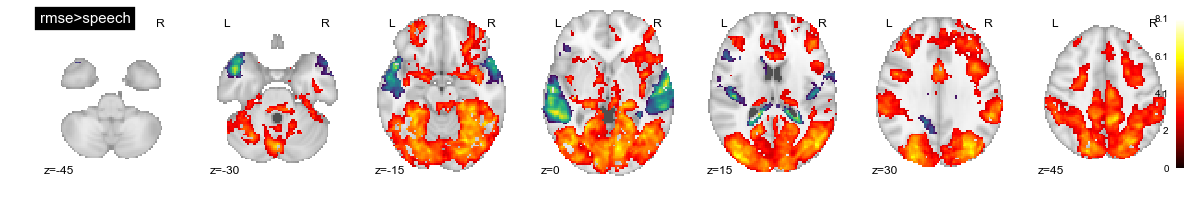

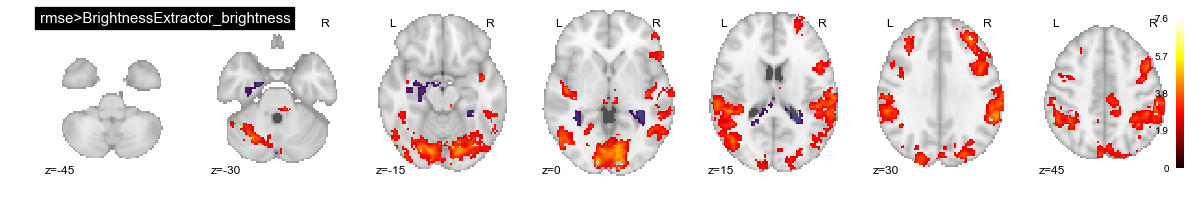

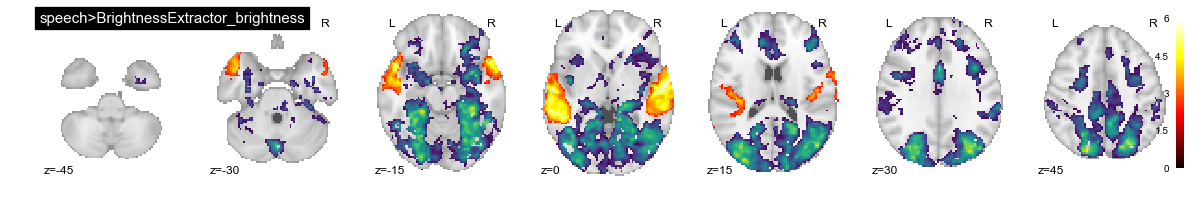

In [288]:
for i, l in enumerate(labels):
    fig = niplt.plot_stat_map('D:neuroscout/analyses/merlin/facesome/group/stats/contrast_%02d/zstat1_threshold.nii.gz' % (i+1,),
                             title=l, display_mode='z', cut_coords=np.arange(-45, 52, 15)) 
    fig.add_overlay('D:neuroscout/analyses/merlin/facesome/group/stats/contrast_%02d/zstat1_maths_threshold.nii.gz' % (i+1,),
                             cmap=plt.get_cmap('viridis')) 


In [282]:
plt.get_cmap('Blues')

## Correlation of features

In [330]:
def cross_corr(EVs):
    dfs = []
    for e in EVs:
        df = pd.read_csv(e, delimiter=' ', header=None)
        df['trial_type'] = basename(e)
        dfs.append(df)
    EVs = pd.concat(dfs).rename(columns={0: 'onset', 1: 'duration', 2: 'amplitude'})
    piv =EVs.pivot('onset', 'trial_type', 'amplitude')
    return piv.corr()

In [331]:
cross_corr(glob('D:neuroscout/tmp/merlinsome/first_level/modelfit/_subject_id_20/level1design/ev*'))

trial_type,ev_BrightnessExtractor_brightness_0_3.txt,ev_face_0_4.txt,ev_rmse_0_1.txt,ev_speech_0_2.txt
trial_type,,,,
ev_BrightnessExtractor_brightness_0_3.txt,1.000000,0.109418,0.223848,0.030778
ev_face_0_4.txt,0.109418,1.000000,-0.139235,0.304040
ev_rmse_0_1.txt,0.223848,-0.139235,1.000000,-0.207000
ev_speech_0_2.txt,0.030778,0.304040,-0.207000,1.000000


# HCP like Model

In [553]:
corr = cross_corr(glob('D:neuroscout/tmp/hcprep//first_level/modelfit/_subject_id_20/level1design/ev*'))

def corr_plot(corr, vmax=None):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    if vmax is None:
        vmax = corr[corr!=mask].abs().max().max()

    # Draw the heatmap with the mask and correct aspect ratio
    return sns.heatmap(corr, mask=mask, vmax=vmax, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

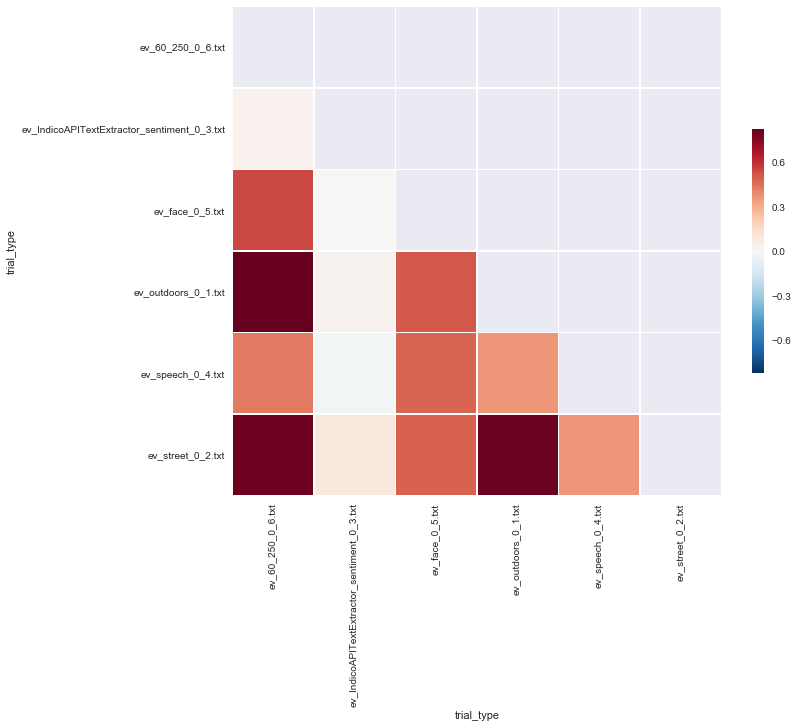

In [554]:
corr = corr_plot(cross_corr(glob('D:neuroscout/tmp/hcprep3/first_level/modelfit/_subject_id_19/level1design/ev*')))


In [614]:
contrasts = [(u'street', 'T', [u'street', u'outdoors', u'IndicoAPITextExtractor_sentiment', u'60_250', u'face', u'speech'], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]), (u'outdoors', 'T', [u'street', u'outdoors', u'IndicoAPITextExtractor_sentiment', u'60_250', u'face', u'speech'], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0]), (u'IndicoAPITextExtractor_sentiment', 'T', [u'street', u'outdoors', u'IndicoAPITextExtractor_sentiment', u'60_250', u'face', u'speech'], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0]), (u'60_250', 'T', [u'street', u'outdoors', u'IndicoAPITextExtractor_sentiment', u'60_250', u'face', u'speech'], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0]), (u'face', 'T', [u'street', u'outdoors', u'IndicoAPITextExtractor_sentiment', u'60_250', u'face', u'speech'], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]), (u'speech', 'T', [u'street', u'outdoors', u'IndicoAPITextExtractor_sentiment', u'60_250', u'face', u'speech'], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0])]
labels = list(zip(*contrasts))[0]

In [616]:
merlin1_labels = ['Zadbood Street', 'Zadbood Outdoors', 'sentiment', 'Zadbood 60-250hz', 'Zadbood Face', 'Zadbood Speech']

C:\Users\aid338\AppData\Roaming\Python\Python35\site-packages\nilearn\plotting\displays.py:656: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:861: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


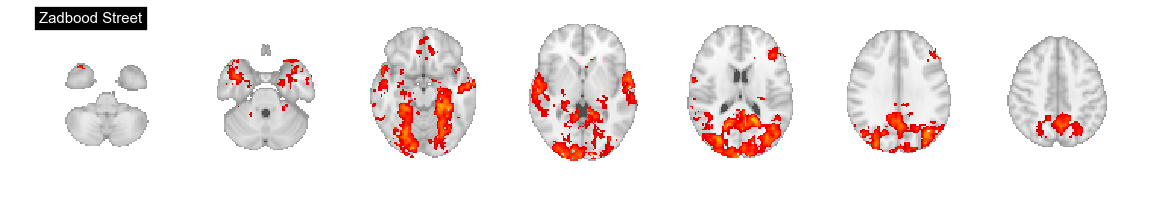

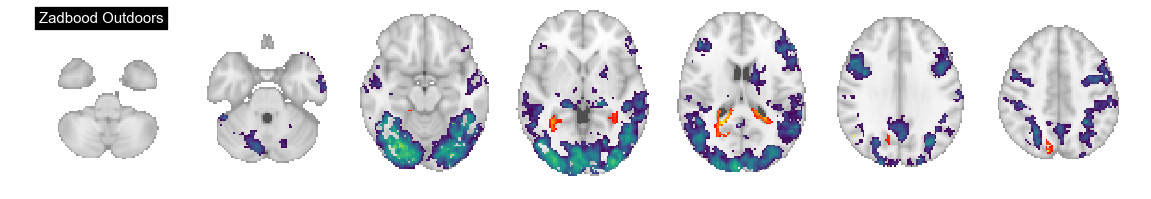

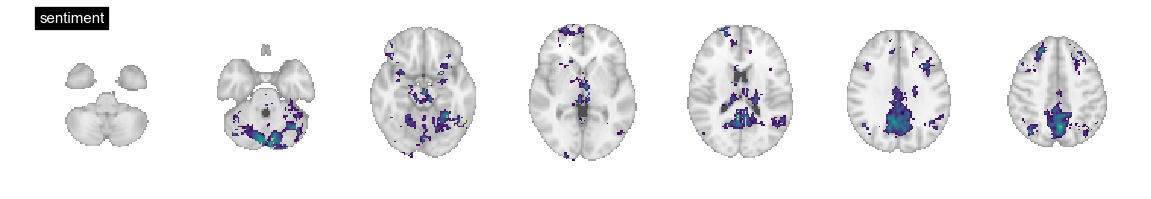

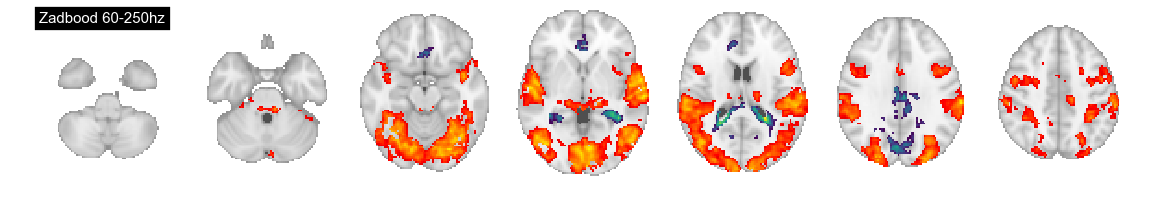

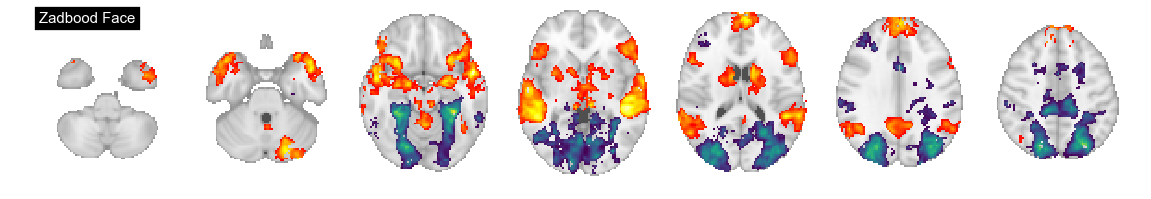

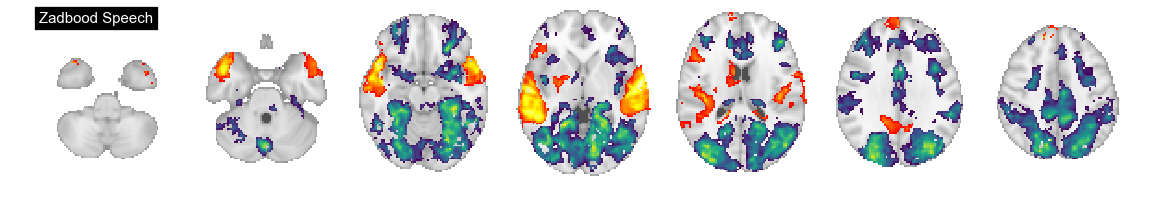

In [623]:
for i, l in enumerate(merlin1_labels):
    fig = niplt.plot_stat_map('D:neuroscout/analyses/merlin/hcprep3//group/stats/contrast_%02d/zstat1_threshold.nii.gz' % (i+1,),
                             title=l, display_mode='z', cut_coords=np.arange(-45, 52, 15), colorbar=False, annotate=False) 
    fig.add_overlay('D:neuroscout/analyses/merlin/hcprep3/group/stats/contrast_%02d/zstat1_maths_threshold.nii.gz' % (i+1,),
                             cmap=plt.get_cmap('viridis')) 

## Cross correlate 

In [575]:
merlin_images = [nib.load(f) for f in glob('D:neuroscout/analyses/merlin/hcprep3//group/stats/contrast_*/zstat1.nii.gz')[0:6]]

In [576]:
merlin_flat_data = [a.get_data().flatten() for a in merlin_images]

In [577]:
all_merlin = np.vstack(merlin_flat_data)

In [578]:
merlin_labels = ["merlin_" + l for l in ['street', 'outdoors', 'sentiment', '60_250', 'face', 'speech']]
all_merlin =  pd.DataFrame(all_merlin.T, columns=merlin_labels)


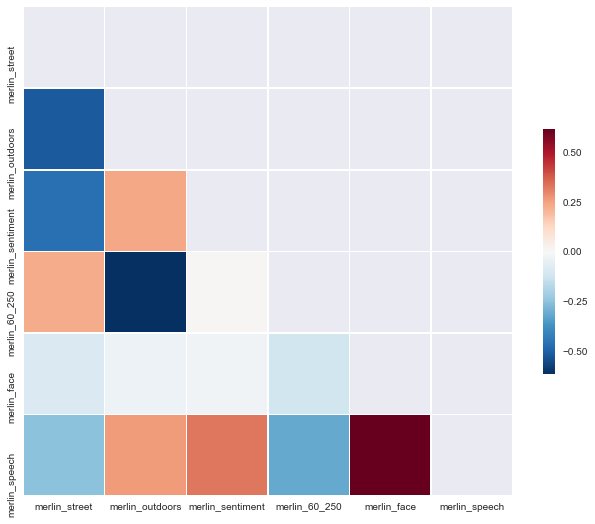

In [579]:
corr_plot(all_merlin.corr(), vmax=0.6)

### HCP

In [515]:
hcp_images = [nib.load(f) for f in glob('D:neuroscout/analyses/hcp/kdd_fx/group/stats/contrast_*/zstat1_2mm.nii.gz')]
hcp_flat_data = [a.get_data().flatten() for a in hcp_images]
all_hcp = np.vstack(hcp_flat_data)

In [619]:
hcp_labels = ['HCP street', 'HCP outdoors', 'HCP light', 'HCP adult', 'HCP sentiment',
              'HCP frequency', 'HCP concrete', 'HCP speech','HCP 60-250 hz','HCP face']

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
C:\Users\aid338\AppData\Roaming\Python\Python35\site-packages\nilearn\plotting\displays.py:656: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


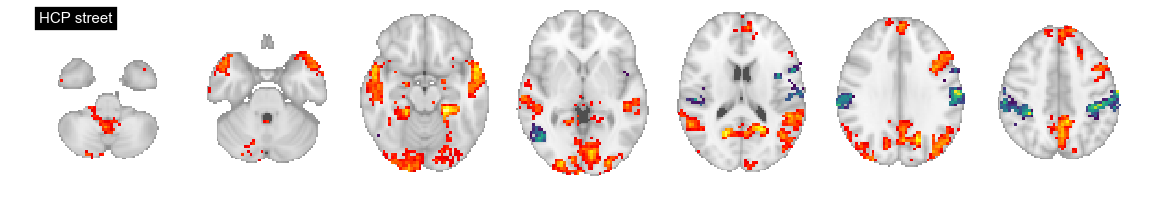

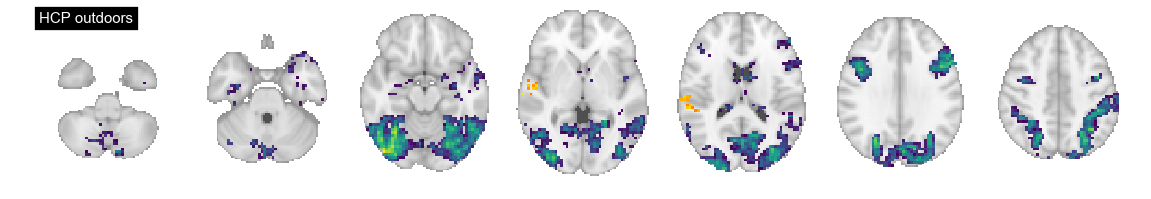

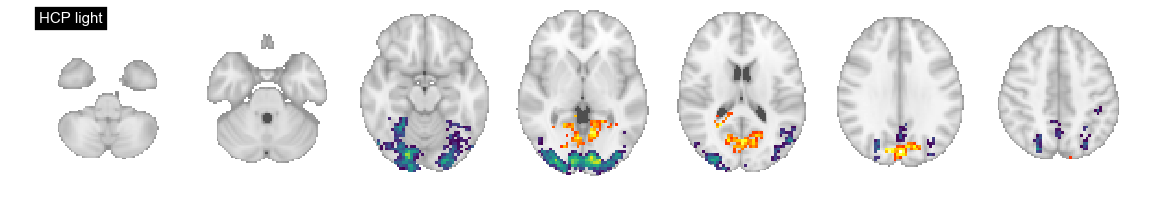

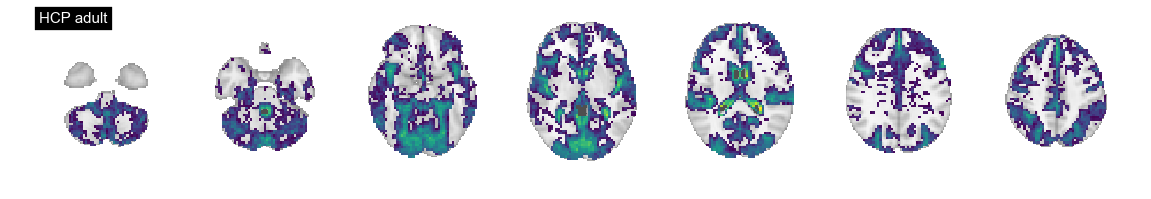

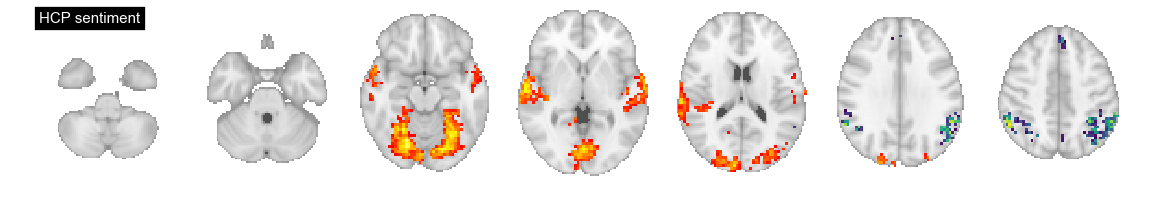

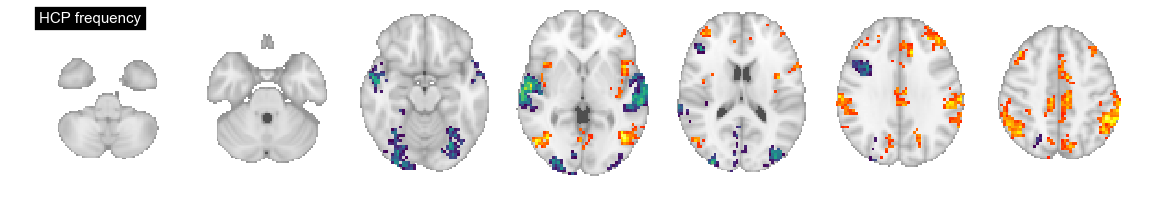

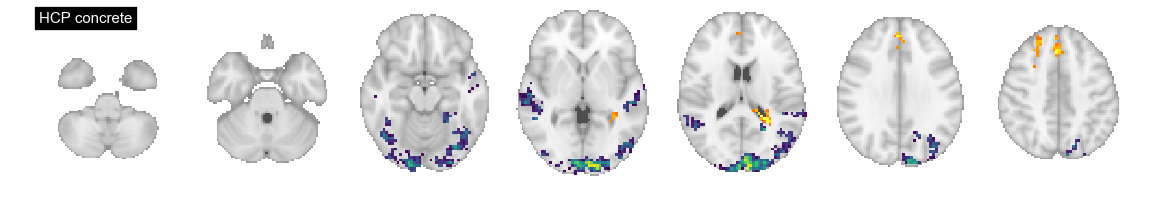

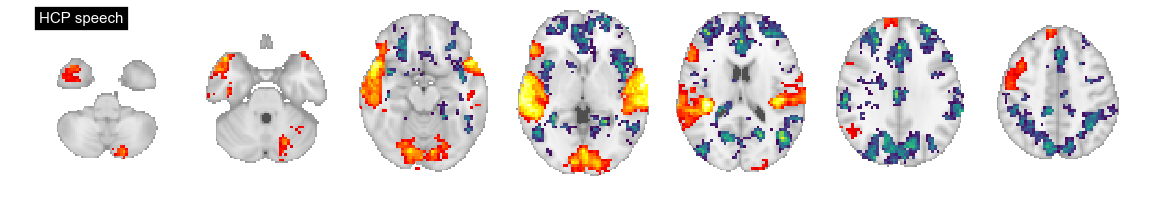

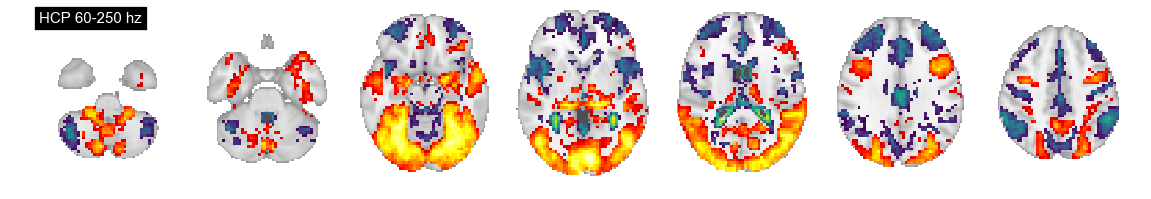

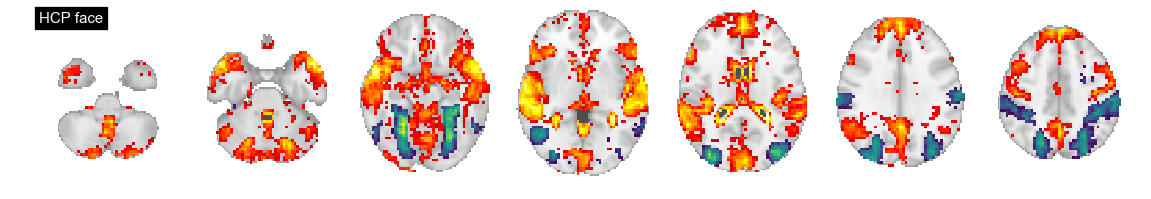

In [622]:
for i, l in enumerate(hcp_labels):
    fig = niplt.plot_stat_map('D:neuroscout/analyses/hcp/kdd_fx/group/stats/contrast_%02d/zstat1_threshold.nii.gz' % (i+1,),
                             title=l, display_mode='z', cut_coords=np.arange(-45, 52, 15), colorbar=False, annotate=False) 
    fig.add_overlay('D:neuroscout/analyses/hcp/kdd_fx/group/stats/contrast_%02d/zstat1_maths_threshold.nii.gz' % (i+1,),
                             cmap=plt.get_cmap('viridis')) 

In [517]:
all_hcp = pd.DataFrame(all_hcp.T, columns=hcp_labels)

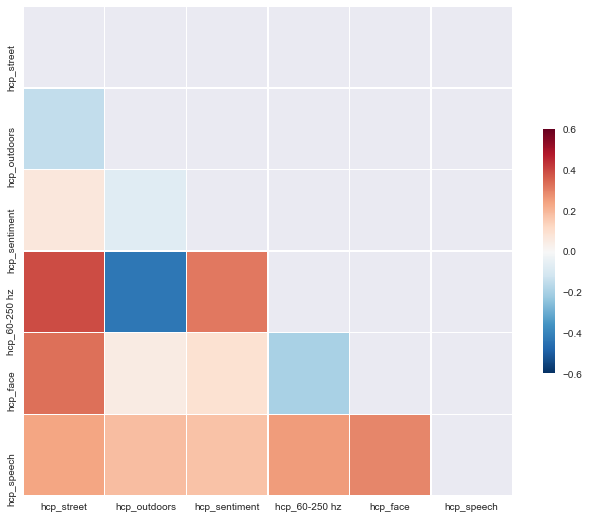

In [558]:
corr_plot(all_hcp[['hcp_street', 'hcp_outdoors', 'hcp_sentiment', 'hcp_60-250 hz', 'hcp_face', 'hcp_speech']].corr(), vmax=0.6)

In [522]:
all_corr = pd.concat([all_merlin, all_hcp[['hcp_street', 'hcp_outdoors', 'hcp_sentiment', 'hcp_60-250 hz', 'hcp_face', 'hcp_speech']]], axis=1).corr()

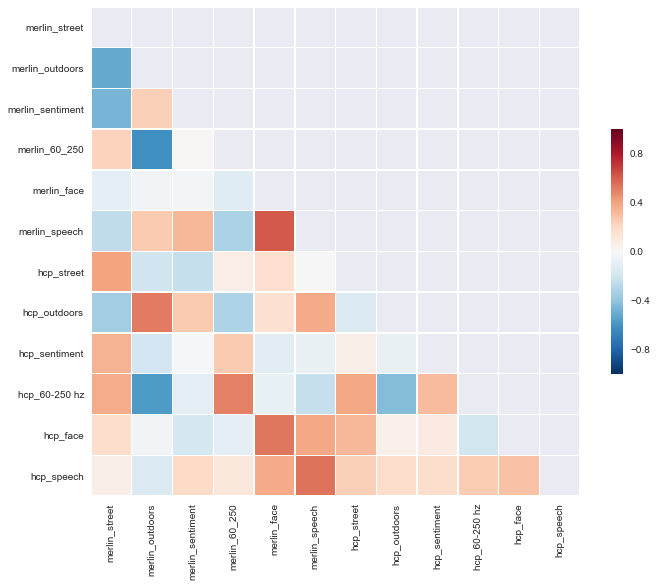

In [523]:
corr_plot(all_corr)

In [506]:
all_merlin.corrwith(all_hcp[['street', 'outdoors', 'sentiment', '60_250', 'face', 'speech']])

street       0.403922
outdoors     0.520805
sentiment   -0.013190
60_250       0.500136
face         0.542428
speech       0.549950
dtype: float64

### Forrest

In [612]:
forrest_labels = ['Hanke - Face', 'Hanke - Speech']

C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


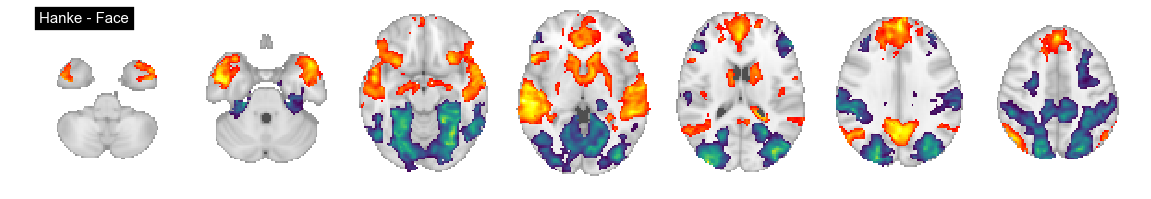

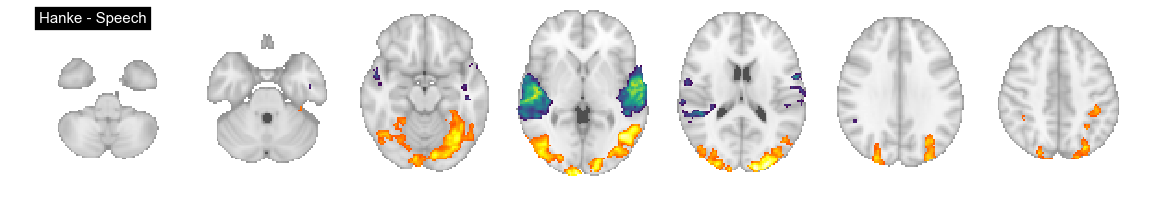

In [621]:
for i, l in enumerate(forrest_labels):
    fig = niplt.plot_stat_map('D:neuroscout/analyses/forrest/faces_speech/group/stats/contrast_%02d/zstat1_threshold.nii.gz' % (i+1,),
                             title=l, display_mode='z', cut_coords=np.arange(-45, 52, 15), colorbar=False, annotate=False) 
    fig.add_overlay('D:neuroscout/analyses/forrest/faces_speech/group/stats/contrast_%02d/zstat1_maths_threshold.nii.gz' % (i+1,),
                             cmap=plt.get_cmap('viridis')) 

In [570]:
forrest_images = [nib.load(f) for f in glob('D:neuroscout/analyses/forrest/faces_speech/group/stats/contrast_*/zstat1.nii.gz')]
forrest_flat_data = [a.get_data().flatten() for a in forrest_images]
all_forrest = all_merlin =  pd.DataFrame(np.vstack(forrest_flat_data).T, columns=forrest_labels)


In [580]:
all_corr_3 = pd.concat([all_merlin, all_hcp[['hcp_street', 'hcp_outdoors', 'hcp_sentiment', 'hcp_60-250 hz', 'hcp_face', 'hcp_speech']], all_forrest], axis=1).corr()

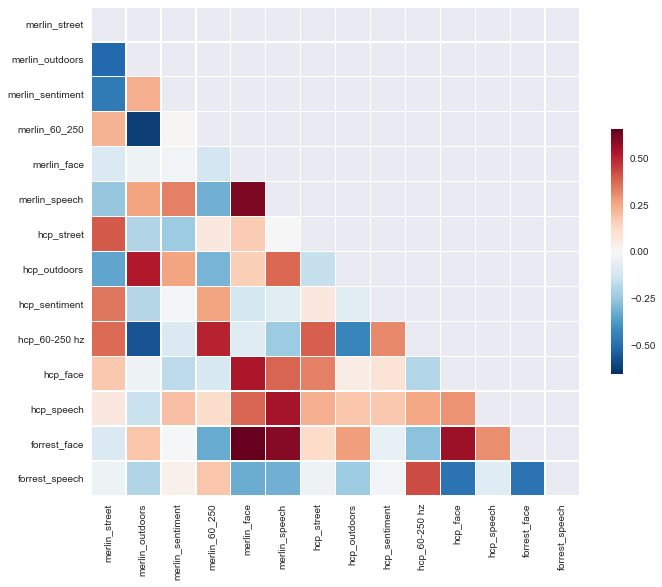

In [581]:
corr_plot(all_corr_3)

In [596]:
all_corr[['merlin_street', 'merlin_outdoors', 'merlin_sentiment', 'merlin_60_250', 'merlin_face', 'merlin_speech']]

,merlin_street,merlin_outdoors,merlin_sentiment,merlin_60_250,merlin_face,merlin_speech
merlin_street,1.000000,-0.514287,-0.464262,0.228992,-0.095658,-0.251705
merlin_outdoors,-0.514287,1.000000,0.236941,-0.614350,-0.035738,0.262021
merlin_sentiment,-0.464262,0.236941,1.000000,0.008059,-0.025567,0.329528
merlin_60_250,0.228992,-0.614350,0.008059,1.000000,-0.119604,-0.316143
merlin_face,-0.095658,-0.035738,-0.025567,-0.119604,1.000000,0.616931
merlin_speech,-0.251705,0.262021,0.329528,-0.316143,0.616931,1.000000
hcp_street,0.402408,-0.195829,-0.240427,0.071015,0.168615,0.001535
hcp_outdoors,-0.346416,0.522309,0.262971,-0.306251,0.158427,0.378588
hcp_sentiment,0.350992,-0.185267,-0.013218,0.261189,-0.113390,-0.072367
hcp_60-250 hz,0.370956,-0.567798,-0.101946,0.501780,-0.080464,-0.240110


In [601]:
np.mean([-.35, 0.35, 0.37, -.17, 0.07, -0.14, -.03, -.57, -.19, -.1, -.17, 0.2, -.11, .11, .38])

-0.023333333333333331

## Many model

In [609]:
mm = ["landscapes", "city", "building", "indoor", "furniture", "animal", "face", "speech"]

C:\Users\aid338\AppData\Roaming\Python\Python35\site-packages\nilearn\plotting\displays.py:656: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
C:\Program Files\Anaconda3\lib\site-packages\numpy\ma\core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


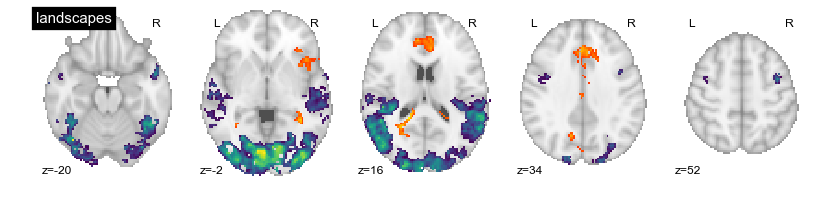

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:861: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


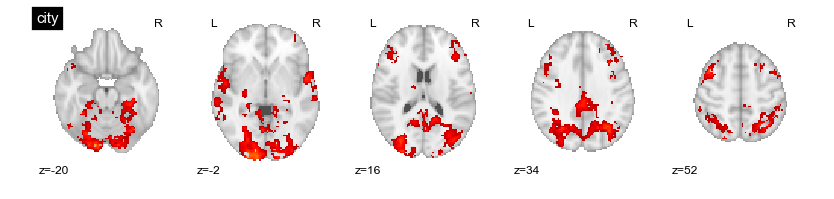

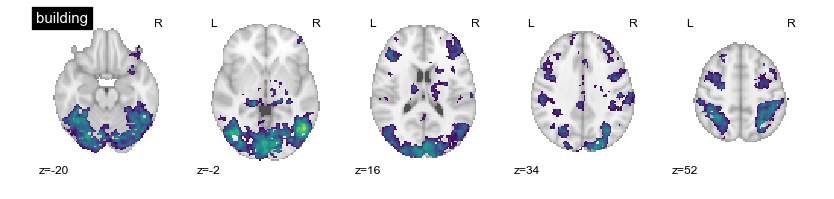

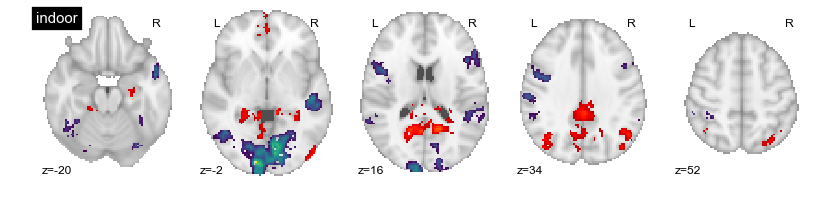

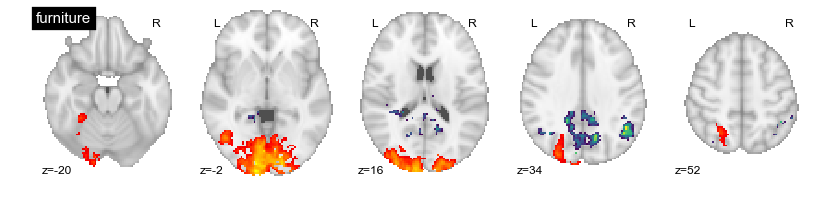

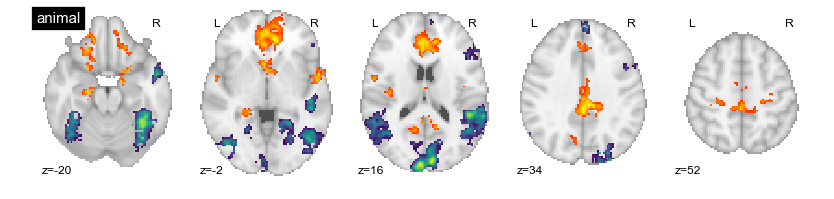

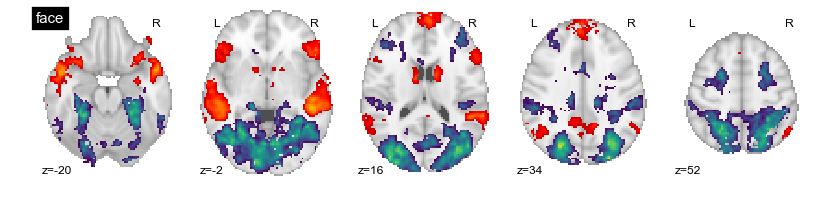

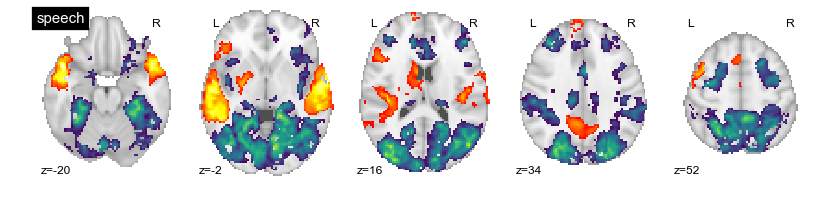

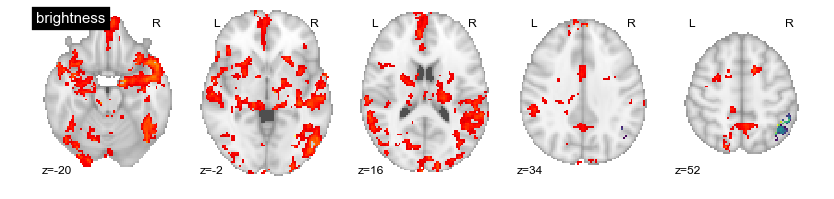

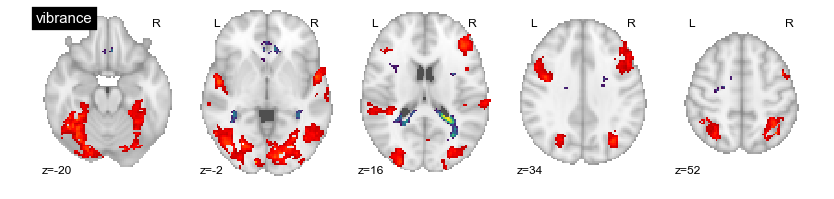

In [611]:
for i, l in enumerate(mm):
    fig = niplt.plot_stat_map('D:neuroscout/analyses/merlin/merlin_many2/stats/contrast_%02d/zstat1_threshold.nii.gz' % (i+1,),
                             title=l, display_mode='z', cut_coords=np.arange(-20, 60, 18), colorbar=False) 
    fig.add_overlay('D:neuroscout/analyses/merlin/merlin_many2/stats/contrast_%02d/zstat1_maths_threshold.nii.gz' % (i+1,),
                         cmap=plt.get_cmap('viridis'), ) 